In [10]:
import numpy as np
import pandas as pd

# Problem 1

In [11]:
x=np.array([[1,2,0],[2,1,0],[0,0,0]])

In [12]:
x_bar=np.mean(x,1)

In [13]:
x_bar

array([1., 1., 0.])

In [14]:
x_bar=np.vstack((x_bar,x_bar,x_bar))

In [34]:
x_tilda=x-x_bar

In [45]:
x_tilda

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [-1., -1.,  0.]])

In [48]:
np.linalg.svd(x_tilda)

(array([[-4.08248290e-01,  7.07106781e-01,  5.77350269e-01],
        [-4.08248290e-01, -7.07106781e-01,  5.77350269e-01],
        [ 8.16496581e-01, -1.67883653e-16,  5.77350269e-01]]),
 array([1.73205081, 1.        , 0.        ]),
 array([[-0.70710678, -0.70710678, -0.        ],
        [-0.70710678,  0.70710678,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]))

In [35]:
np.transpose(x_tilda)

array([[ 0.,  1., -1.],
       [ 1.,  0., -1.],
       [ 0.,  0.,  0.]])

In [50]:
C=np.dot(np.transpose(x_tilda),x_tilda)

In [51]:
C

array([[2., 1., 0.],
       [1., 2., 0.],
       [0., 0., 0.]])

In [52]:
values,vec=np.linalg.eig(C)

In [53]:
values[0:2]

array([3., 1.])

In [54]:
vec[:,(0,1)]

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678],
       [ 0.        ,  0.        ]])

In [59]:
first_component=np.dot(np.transpose(vec[:,0]),x_tilda)

In [60]:
first_component

array([0.70710678, 0.70710678, 0.        ])

In [61]:
second_component=np.dot(np.transpose(vec[:,1]),x_tilda)

In [62]:
second_component

array([ 0.70710678, -0.70710678,  0.        ])

# Problem 3

In [46]:
import scipy.io as sio 

In [61]:
mnist_data=sio.loadmat('mnist.mat')['fea']
mnist_label=sio.loadmat('mnist.mat')['gnd']

In [48]:
mnist_data.shape

(70000, 784)

In [49]:
label_0=mnist_label[mnist_label==10]

In [50]:
len(label_0)

6903

In [51]:
ind_0=np.where(mnist_label==10)[0]

In [63]:
ind_1=np.where(mnist_label==1)[0]

In [52]:
len(ind_0)

6903

In [53]:
mnist_0=mnist_data[ind_0,]

In [64]:
mnist_1=mnist_data[ind_1,]

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [66]:
# Standardizing the features


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mnist_0)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [67]:
principalDf.iloc[:,0].head()

0   -1.792063
1   -1.290152
2   -4.885733
3   -4.916711
4    1.434262
Name: principal component 1, dtype: float64

In [68]:
#principalDf.head(3)
pca.explained_variance_

array([8.57779896, 6.33910374])

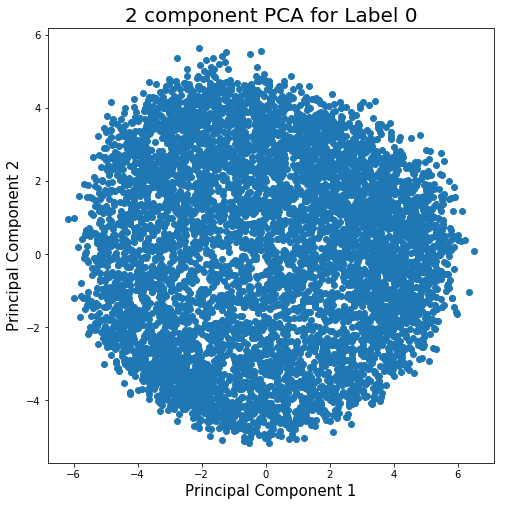

In [69]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for Label 0', fontsize = 20)


ax.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1])

In [70]:
ind_1=np.where(mnist_label==1)[0]


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mnist_1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

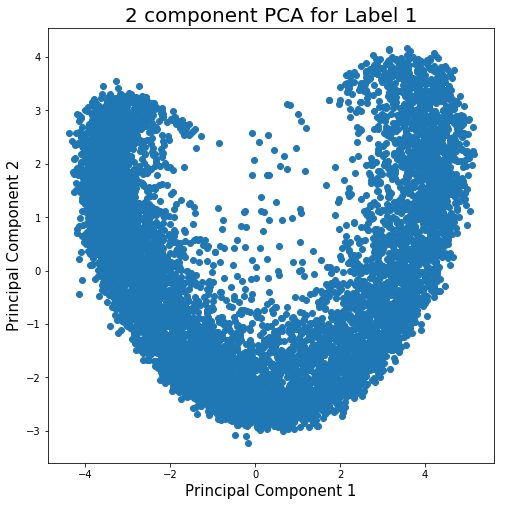

In [71]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for Label 1', fontsize = 20)


ax.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1])

In [72]:
label_01=mnist_label[(mnist_label==10) | (mnist_label==1)]

In [73]:
len(label_01)

14780

In [74]:
ind_10=np.where((mnist_label==10) | (mnist_label==1))[0]

In [75]:
mnist_10=mnist_data[ind_10,]

In [76]:


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mnist_10)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [77]:
principalDf.shape

(14780, 2)

In [78]:
label_01=pd.DataFrame(data=label_01)

In [79]:
finalDf = pd.concat([principalDf, label_01], axis = 1)

In [82]:
finalDf.head()

,principal component 1,principal component 2,0
0,4.389663,1.164847,10
1,-3.454250,3.738307,1
2,-3.133637,-3.422741,1
3,-3.391544,-3.034624,1
4,-3.526521,-2.819029,1


In [80]:
indicesToKeep0 = finalDf.iloc[:,2] == 10
indicesToKeep1 = finalDf.iloc[:,2] == 1

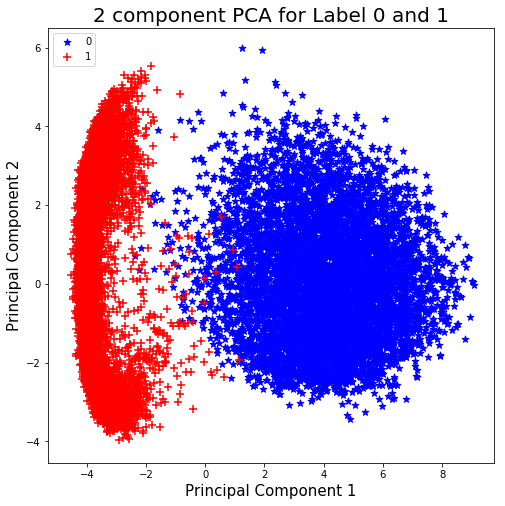

In [81]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for Label 0 and 1', fontsize = 20)
ax.scatter(finalDf.loc[indicesToKeep0, 'principal component 1']
               , finalDf.loc[indicesToKeep0, 'principal component 2']
               , c = 'blue',marker='*'
               , s = 50,label='0')
ax.scatter(finalDf.loc[indicesToKeep1, 'principal component 1']
               , finalDf.loc[indicesToKeep1, 'principal component 2']
               , c = 'red',marker='+'
               , s = 50,label='1')
leg=ax.legend(loc='upper left')


# Problem 4 

In [402]:
train = np.loadtxt('zip.train')
test  = np.loadtxt('zip.test')

In [403]:
y_train=train[:,0]
x_train=train[:,1:]
y_test=test[:,0]
x_test=test[:,1:]

In [404]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((7291, 256), (2007, 256), (7291,), (2007,))

In [405]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Text(0.5,1,'Components vs Variances USPS')

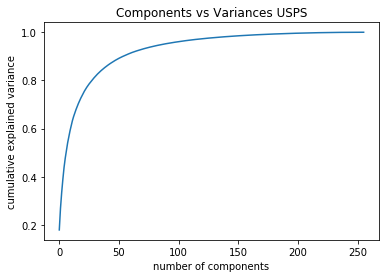

In [406]:
pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Components vs Variances USPS')

In [410]:
np.cumsum(pca.explained_variance_ratio_)[0:85]

array([0.17884424, 0.26851464, 0.33423191, 0.38977737, 0.43891926,
       0.47743849, 0.51014905, 0.54085934, 0.56652756, 0.5908946 ,
       0.61266974, 0.6328776 , 0.64991374, 0.66460489, 0.67876712,
       0.69174796, 0.70399751, 0.71552   , 0.72612983, 0.73608162,
       0.7458579 , 0.75498881, 0.7634183 , 0.77119955, 0.77840328,
       0.785385  , 0.791709  , 0.79796986, 0.80411828, 0.80999819,
       0.81559892, 0.8210432 , 0.82625594, 0.83107923, 0.8357988 ,
       0.84040553, 0.8447586 , 0.84888292, 0.85294608, 0.85684569,
       0.86066624, 0.86426619, 0.86783134, 0.87111713, 0.87433333,
       0.87748633, 0.88062028, 0.88359209, 0.8864565 , 0.88918805,
       0.89181688, 0.89435906, 0.89677805, 0.89912859, 0.9014044 ,
       0.9036568 , 0.90584342, 0.90794691, 0.91001465, 0.91207342,
       0.91411697, 0.91595839, 0.91774233, 0.91947335, 0.92115611,
       0.9227938 , 0.92436075, 0.92591837, 0.92742352, 0.92888357,
       0.93033286, 0.93173651, 0.93311432, 0.93445414, 0.93573

In [411]:
cum_variance=np.cumsum(pca.explained_variance_ratio_)

In [412]:
#to preserve 95% of total variance 
train.shape[1]-len(cum_variance[cum_variance>0.95])

88

In [413]:
#to preserve 50% of total variance 
train.shape[1]-len(cum_variance[cum_variance>0.5])

7

In [414]:
y_train=train[:,0]
x_train=train[:,1:]
y_test=test[:,0]
x_test=test[:,1:]

In [415]:
y_train

array([6., 5., 4., ..., 3., 0., 1.])

In [416]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,LeaveOneOut,train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
% matplotlib inline

In [462]:
test_error=[]
compute_time=[]

for i in range(1,11):
    start=time.time()
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error.append(test_scores)
    end=time.time()
    compute_time.append(end-start)
print(test_error)
print(compute_time)

[0.05630293971101141, 0.05879422022919778, 0.05530642750373693, 0.05680119581464871, 0.05530642750373693, 0.06128550074738415, 0.058295964125560484, 0.059292476332835076, 0.06278026905829592, 0.06427503736920781]
[5.6304779052734375, 6.0618438720703125, 5.83871603012085, 6.017092704772949, 5.741058111190796, 5.683049917221069, 5.734858989715576, 5.904860258102417, 5.762287855148315, 6.661023855209351]


In [477]:
min(test_error),min(test_error_pca_95)

(0.05530642750373693, 0.05231689088191327)

In [463]:
#pca with KNN with 50% variance 
pca50 = PCA(0.5)
pca50.fit(x_train)
x_train_transformed_50 = pca50.transform(x_train)
x_test_transformed_50=pca50.transform(x_test)

In [464]:
x_test.shape

(2007, 256)

In [465]:
x_train_transformed_50.shape, x_test_transformed_50.shape

((7291, 7), (2007, 7))

In [466]:
x_train_transformed_50, x_test_transformed_50

(array([[ 4.94267554, -6.22892054, -2.35475639, ..., -0.04857027,
          0.47492774,  1.89201131],
        [ 6.96448832, -1.15779007,  1.41390972, ...,  1.77356109,
         -1.52227959, -0.8615383 ],
        [ 0.97948   ,  1.92803631, -3.61964159, ..., -2.85618182,
          1.8474628 , -2.65522222],
        ...,
        [ 5.08565892,  3.32369075, -3.49146391, ...,  3.19765787,
          0.23960967,  2.17405904],
        [11.96031252, -1.64062004,  0.09676539, ...,  5.51668062,
         -4.60740963,  0.81564612],
        [-5.906753  , -2.75505357, -2.62936305, ...,  5.82986556,
         -2.27906505, -0.266499  ]]),
 array([[-1.03073918,  6.97980502, -0.43359396, ...,  0.15204551,
         -2.17361705, -0.80124256],
        [ 2.03344426, -0.32653575,  5.92589858, ...,  0.91179093,
          1.17579172, -1.79709208],
        [ 2.61466606,  4.60427411, -0.92821269, ..., -0.56396913,
          2.91493408, -0.06805833],
        ...,
        [-1.3599818 ,  1.76063164,  0.74574357, ...,  

In [467]:
pca50.explained_variance_.sum()

61.674156886243466

In [468]:
x_train_transformed_50.shape

(7291, 7)

In [469]:
test_error_pca_50=[]
compute_time_50=[]

for i in range(1,11):
    start=time.time()
    knn = KNeighborsClassifier(n_neighbors=i,p=2)
    knn.fit(x_train_transformed_50, y_train)
    y_pred = knn.predict(x_test_transformed_50)
    test_scores = 1 - (sum(y_pred==y_test))/len(y_pred)
    #test_scores=1-accuracy_score(y_test,y_pred)
    test_error_pca_50.append(test_scores)
    end=time.time()
    compute_time_50.append(end-start)
print(test_error_pca_50)
print(compute_time_50)

[0.17040358744394624, 0.171898355754858, 0.14897857498754363, 0.14549078226208267, 0.14000996512207275, 0.14299950174389642, 0.14299950174389642, 0.14947683109118082, 0.14698555057299456, 0.14897857498754363]
[0.049082040786743164, 0.054956912994384766, 0.049900054931640625, 0.04488015174865723, 0.045530080795288086, 0.04645395278930664, 0.05122184753417969, 0.056356191635131836, 0.05974316596984863, 0.06278228759765625]


In [470]:
x_train_transformed_95.shape, x_test_transformed_95.shape

((7291, 88), (2007, 88))

In [471]:
pca95 = PCA(0.95)
pca95.fit(x_train)
x_train_transformed_95 = pca95.transform(x_train)
x_test_transformed_95=pca95.transform(x_test)

In [472]:
test_error_pca_95=[]
compute_time_95=[]

for i in range(1,11):
    start=time.time()
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_transformed_95, y_train)
    y_pred = knn.predict(x_test_transformed_95)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_pca_95.append(test_scores)
    end=time.time()
    compute_time_95.append(end-start)
print(test_error_pca_95)
print(compute_time_95)

[0.05331340308918786, 0.05580468360737423, 0.05430991529646234, 0.05530642750373693, 0.05231689088191327, 0.05580468360737423, 0.05580468360737423, 0.058295964125560484, 0.06028898854010967, 0.06377678126557051]
[1.3357338905334473, 1.4740920066833496, 1.5353050231933594, 1.4851040840148926, 1.5754868984222412, 1.4731040000915527, 1.476531982421875, 1.649554967880249, 1.4757628440856934, 1.4740889072418213]


In [428]:
neighbours=range(1,11)

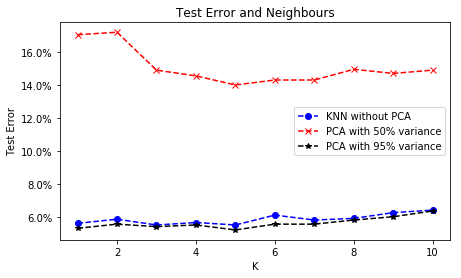

In [429]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

test_error,=plt.plot(neighbours,test_error,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
test_error_pca_50,=plt.plot(neighbours,test_error_pca_50,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
test_error_pca_95,=plt.plot(neighbours,test_error_pca_95,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error and Neighbours')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([test_error,test_error_pca_50,test_error_pca_95],["KNN without PCA","PCA with 50% variance","PCA with 95% variance"])

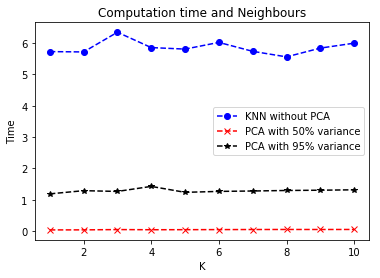

In [430]:


compute_time,=plt.plot(neighbours,compute_time,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
compute_time_50,=plt.plot(neighbours,compute_time_50,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
compute_time_95,=plt.plot(neighbours,compute_time_95,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)

plt.title('Computation time and Neighbours')
plt.xlabel('K')
plt.ylabel('Time')

plt.legend([compute_time,compute_time_50,compute_time_95],["KNN without PCA","PCA with 50% variance","PCA with 95% variance"])

# Problem 5

In [432]:
import math
import operator
import numpy.linalg as LA
import time

In [433]:
def euclideanDistance(instance1, instance2):
 
    return LA.norm(instance1 - instance2)

In [434]:
def getCentroid(arr):
    length = arr.shape[0] # num of points
    return arr.sum(0) / length

In [435]:
def fit(x_train, y_train):
    classes = set(y_train)
    numClass = len(classes)
    class_train = {}
    for i in range(len(x_train)):
        key = y_train[i]
        value = x_train[i]
        if key not in class_train.keys():
            class_train[key] = []
        class_train[key].append(value)
    return class_train

In [436]:
def predict(class_train, x_test, k):
    predictions = []
    keys = class_train.keys()
    
    for x in x_test:
        class_dist = [] # to store [ key, centroid_dist]
        for key in keys:
            value = np.array(class_train[key])
            distances = LA.norm(x - value, axis = 1)           
            idx = np.argsort(distances)
            # use k nearest neighbors to find centroid point and calculate centroid dist through eculideanDistance
            kNearestNeighbors = value[idx[0:k]]
            
            centroid = getCentroid( kNearestNeighbors )
            centroid_dist = LA.norm(centroid - x) 
            
            # add centroid_dist to class_dist (for sorting)
            class_dist.append ( [key, centroid_dist] )
        
        # sort centroid_dist of x
        #class_dist.sort(key=operator.itemgetter(1))
        class_dist = np.array(class_dist)
        rsp_idx = np.argsort(class_dist[:,1])
        # predict y result for x
        #predictions.append(class_dist[0][0])
        predictions.append(class_dist[rsp_idx[0]][0])
             
    return predictions


In [437]:
test_error_kCentroid = []
compute_time_kcentroid=[]

for k in range(1,11):
    
    start = time. time()
    c_train = fit(x_train, y_train)

    y_pred = predict(c_train, x_test[:], k)

    test_scores = 1 - accuracy_score(y_test[:], y_pred)
    test_error_kCentroid.append(test_scores)
    end = time. time()
    compute_time_kcentroid.append(end-start)
    
print(test_error_kCentroid)
print(compute_time_kcentroid)

[0.05630293971101141, 0.05430991529646234, 0.0503238664673642, 0.04434479322371698, 0.04783258594917783, 0.048330842052815126, 0.04783258594917783, 0.04783258594917783, 0.047334329845540646, 0.0498256103637269]
[26.146818161010742, 26.60556411743164, 25.47595500946045, 25.84640097618103, 25.9845449924469, 27.94631600379944, 28.073649883270264, 26.297778844833374, 30.011600971221924, 26.118160009384155]


In [443]:
import pandas as pd

In [449]:
#pca with KNN with 50% variance 
pca50 = PCA(0.5)
pca50.fit(x_train)
x_train_transformed_50 = pca50.transform(x_train)
x_test_transformed_50=pca50.transform(x_test)

In [450]:
test_error_kCentroid_50 = []
compute_time_kcentroid_50=[]

for k in range(1,11):
    
    start = time. time()
    c_train = fit(x_train_transformed_50, y_train)

    y_pred = predict(c_train, x_test_transformed_50[:], k)

    test_scores = 1 - accuracy_score(y_test[:], y_pred)
    test_error_kCentroid_50.append(test_scores)
    end = time. time()
    compute_time_kcentroid_50.append(end-start)
    
print(test_error_kCentroid_50)
print(compute_time_kcentroid_50)

[0.17040358744394624, 0.14897857498754363, 0.14848031888390634, 0.1434977578475336, 0.1509715994020927, 0.14000996512207275, 0.1375186846038864, 0.1375186846038864, 0.13552566018933732, 0.13502740408570002]
[6.548503875732422, 6.608845949172974, 6.690863847732544, 6.333884239196777, 6.6841881275177, 7.069572925567627, 6.112029790878296, 6.111259698867798, 6.106330156326294, 6.146749973297119]


In [451]:
#pca with KNN with 95% variance 
pca95 = PCA(0.95)
pca95.fit(x_train)
x_train_transformed_95 = pca95.transform(x_train)
x_test_transformed_95=pca95.transform(x_test)

In [452]:
test_error_kCentroid_95 = []
compute_time_kcentroid_95=[]

for k in range(1,11):
    
    start = time. time()
    c_train = fit(x_train_transformed_95, y_train)

    y_pred = predict(c_train, x_test_transformed_95[:], k)

    test_scores = 1 - accuracy_score(y_test[:], y_pred)
    test_error_kCentroid_95.append(test_scores)
    end = time. time()
    compute_time_kcentroid_95.append(end-start)
    
print(test_error_kCentroid_95)
print(compute_time_kcentroid_95)

[0.05331340308918786, 0.0503238664673642, 0.045341305430991574, 0.045341305430991574, 0.045341305430991574, 0.045341305430991574, 0.04882909815645242, 0.04783258594917783, 0.04783258594917783, 0.04783258594917783]
[10.945689916610718, 12.105015993118286, 13.092339992523193, 11.954746007919312, 11.825135946273804, 11.311872959136963, 12.040434837341309, 11.531171798706055, 12.354251146316528, 11.646471977233887]


In [478]:
min(test_error_kCentroid_95),min(test_error_kCentroid)

(0.045341305430991574, 0.04434479322371698)

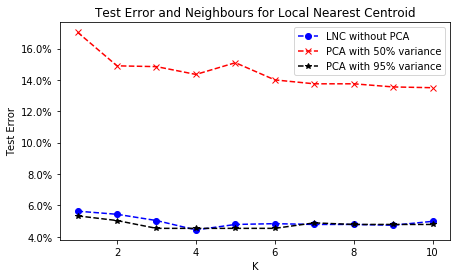

In [455]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

test_error,=plt.plot(neighbours,test_error_kCentroid,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
test_error_pca_50,=plt.plot(neighbours,test_error_kCentroid_50,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
test_error_pca_95,=plt.plot(neighbours,test_error_kCentroid_95,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error and Neighbours for Local Nearest Centroid')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([test_error,test_error_pca_50,test_error_pca_95],["LNC without PCA","PCA with 50% variance","PCA with 95% variance"])

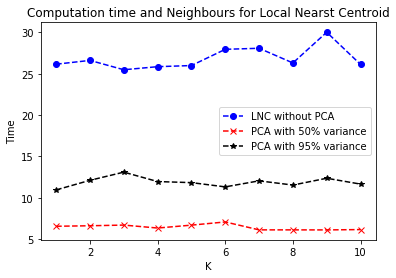

In [456]:
compute_time,=plt.plot(neighbours,compute_time_kcentroid,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
compute_time_50,=plt.plot(neighbours,compute_time_kcentroid_50,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
compute_time_95,=plt.plot(neighbours,compute_time_kcentroid_95,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)

plt.title('Computation time and Neighbours for Local Nearst Centroid')
plt.xlabel('K')
plt.ylabel('Time')

plt.legend([compute_time,compute_time_50,compute_time_95],["LNC without PCA","PCA with 50% variance","PCA with 95% variance"])

In [457]:
import matplotlib.pylab as pl
colors = pl.cm.jet(np.linspace(0,1,6))

In [459]:
test_error

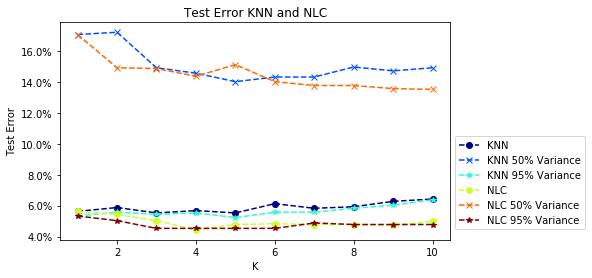

In [474]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

test_error_KNN,=plt.plot(neighbours,test_error,color=colors[0],linestyle='dashed',marker='o',
        markerfacecolor=colors[0],markersize=6)
test_error_pca_50_KNN,=plt.plot(neighbours,test_error_pca_50,color=colors[1],linestyle='dashed',marker='x',
        markerfacecolor=colors[1],markersize=6)
test_error_pca_95_KNN,=plt.plot(neighbours,test_error_pca_95,color=colors[2],linestyle='dashed',marker='*',
        markerfacecolor=colors[2],markersize=6)

test_error_LNC,=plt.plot(neighbours,test_error_kCentroid,color=colors[3],linestyle='dashed',marker='o',
        markerfacecolor=colors[3],markersize=6)
test_error_pca_50_LNC,=plt.plot(neighbours,test_error_kCentroid_50,color=colors[4],linestyle='dashed',marker='x',
        markerfacecolor=colors[4],markersize=6)
test_error_pca_95_LNC,=plt.plot(neighbours,test_error_kCentroid_95,color=colors[5],linestyle='dashed',marker='*',
        markerfacecolor=colors[5],markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error KNN and NLC')
plt.xlabel('K')
plt.ylabel('Test Error')
plt.legend([test_error_KNN, test_error_pca_50_KNN,test_error_pca_95_KNN,test_error_LNC,test_error_pca_50_LNC,
           test_error_pca_95_LNC],['KNN','KNN 50% Variance','KNN 95% Variance','NLC','NLC 50% Variance','NLC 95% Variance'],
          bbox_to_anchor=(1, 0.5) )

# Problem 6 

In [613]:
breastcancer=pd.read_csv('breastcancer.csv')
breastcancer=breastcancer.drop(breastcancer.columns[0],1)
breastcancer_x=breastcancer.iloc[:,[0,1,2,3,4,5,6,7,8]]
breastcancer_y=breastcancer.iloc[:,9]

In [614]:
from sklearn.model_selection import train_test_split

In [615]:
x_train_bc, x_test_bc, y_train_bc, y_test_bc = train_test_split(
...     breastcancer_x, breastcancer_y, test_size=0.1, random_state=123)

In [616]:
x_train=x_train_bc
x_test=x_test_bc 
y_train=y_train_bc
y_test=y_test_bc

In [617]:
def linear_weight(x):
        k=x.shape[1]
        x=x.transpose()
        weights=((x[k-1,:]-x)/(x[k-1,:]-x[0,:])).transpose()
        return weights

In [618]:
test_error_bc=[]
compute_time_bc=[]

for i in range(2,12):
    start=time.time()
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean', weights=linear_weight)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_bc.append(test_scores)
    end=time.time()
    compute_time_bc.append(end-start)
print(test_error_bc)
print(compute_time_bc)

[0.0714285714285714, 0.042857142857142816, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.02857142857142858]
[0.004465818405151367, 0.001725912094116211, 0.0020248889923095703, 0.0018639564514160156, 0.0018520355224609375, 0.0020380020141601562, 0.001850128173828125, 0.00167083740234375, 0.0016748905181884766, 0.0016658306121826172]


/Users/xinzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


Text(0.5,1,'Variance and Number of Components Breast Cancer Data')

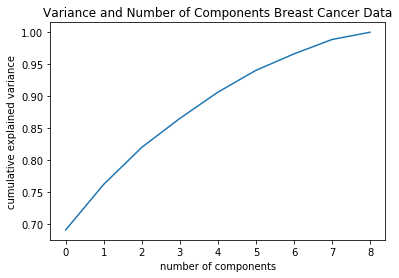

In [619]:
pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Variance and Number of Components Breast Cancer Data')

In [620]:
np.cumsum(pca.explained_variance_ratio_)

array([0.69142594, 0.76254117, 0.82029759, 0.86544588, 0.90643889,
       0.94050018, 0.96618463, 0.98866779, 1.        ])

In [621]:
#pca with KNN with 50% variance 
pca80 = PCA(0.8)
pca80.fit(x_train)
x_train_transformed_80 = pca80.transform(x_train)
x_test_transformed_80=pca80.transform(x_test)

In [622]:
x_train_transformed_80.shape

(629, 3)

In [623]:
test_error_pca_80=[]
compute_time_80=[]

for i in range(2,12):
    start=time.time()
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean', weights=linear_weight)
    knn.fit(x_train_transformed_80, y_train)
    y_pred = knn.predict(x_test_transformed_80)
    test_scores = 1 - (sum(y_pred==y_test))/len(y_pred)
    #test_scores=1-accuracy_score(y_test,y_pred)
    test_error_pca_80.append(test_scores)
    end=time.time()
    compute_time_80.append(end-start)
print(test_error_pca_80)
print(compute_time_80)

[0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235, 0.014285714285714235]
[0.0038650035858154297, 0.0019338130950927734, 0.0012772083282470703, 0.0014231204986572266, 0.0015850067138671875, 0.0016319751739501953, 0.0013818740844726562, 0.001638174057006836, 0.0012819766998291016, 0.001277923583984375]


/Users/xinzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


In [624]:
pca95 = PCA(0.95)
pca95.fit(x_train)
x_train_transformed_95 = pca95.transform(x_train)
x_test_transformed_95=pca95.transform(x_test)

In [625]:
x_train_transformed_95.shape

(629, 7)

In [635]:
test_error_pca_95=[]
compute_time_95=[]

for i in range(2,12):
    start=time.time()
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean', weights=linear_weight)
    knn.fit(x_train_transformed_95, y_train)
    y_pred = knn.predict(x_test_transformed_95)
    test_scores = 1 - accuracy_score(y_test, y_pred)
    test_error_pca_95.append(test_scores)
    end=time.time()
    compute_time_95.append(end-start)
print(test_error_pca_95)
print(compute_time_95)

[0.042857142857142816, 0.042857142857142816, 0.02857142857142858, 0.02857142857142858, 0.02857142857142858, 0.02857142857142858, 0.02857142857142858, 0.02857142857142858, 0.02857142857142858, 0.02857142857142858]
[0.0037152767181396484, 0.002176046371459961, 0.0017499923706054688, 0.0012319087982177734, 0.0012309551239013672, 0.0019178390502929688, 0.002074718475341797, 0.0013728141784667969, 0.0014719963073730469, 0.001950979232788086]


/Users/xinzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


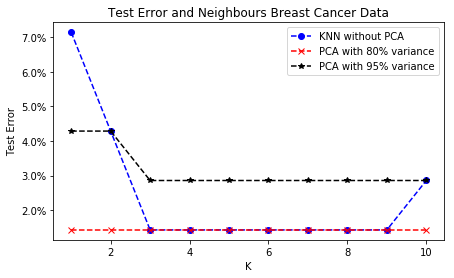

In [627]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

test_error,=plt.plot(neighbours,test_error_bc,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
test_error_pca_50,=plt.plot(neighbours,test_error_pca_80,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
test_error_pca_95,=plt.plot(neighbours,test_error_pca_95,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error and Neighbours Breast Cancer Data')
plt.xlabel('K')
plt.ylabel('Test Error')

plt.legend([test_error,test_error_pca_50,test_error_pca_95],["KNN without PCA","PCA with 80% variance","PCA with 95% variance"])

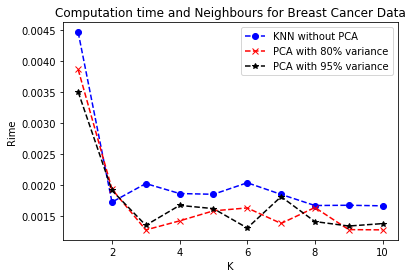

In [628]:
compute_time,=plt.plot(neighbours,compute_time_bc,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
compute_time_50,=plt.plot(neighbours,compute_time_80,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
compute_time_95,=plt.plot(neighbours,compute_time_95,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)

plt.title('Computation time and Neighbours for Breast Cancer Data')
plt.xlabel('K')
plt.ylabel('Rime')

plt.legend([compute_time,compute_time_50,compute_time_95],["KNN without PCA","PCA with 80% variance","PCA with 95% variance"])

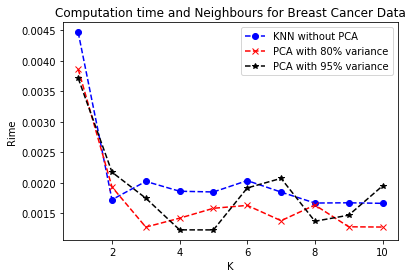

In [636]:
compute_time,=plt.plot(neighbours,compute_time_bc,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
compute_time_50,=plt.plot(neighbours,compute_time_80,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
compute_time_95,=plt.plot(neighbours,compute_time_95,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)

plt.title('Computation time and Neighbours for Breast Cancer Data')
plt.xlabel('K')
plt.ylabel('Rime')

plt.legend([compute_time,compute_time_50,compute_time_95],["KNN without PCA","PCA with 80% variance","PCA with 95% variance"])